In [1]:
import customTree
import numpy as np
import pickle

In [2]:
ds_path='../../../../local/scratch/datasets/ImageNet/ILSVRC2012/'
ds_info_path='../../../../local/scratch/datasets/ImageNet/ILSVRC2012/robustness/'

In [3]:
tree=customTree.ImagenetTree(ds_path,ds_info_path)

In [4]:
tree.calculate_wu_palmer_similarity('n02102177','n02102040'),tree.calculate_jcn_similarity('n02102177','n02102040')

(0.9444444444444444, 0.45511961331341894)

In [ ]:
tree.calculate_wu_palmer_similarity('n02110958','n02102040'),tree.calculate_jcn_similarity('n02110958','n02102040')

(0.6666666666666666, 0.09839799474441724)

In [6]:
tree.calculate_wu_palmer_similarity('n02110958','n02102040'),tree.calculate_jcn_similarity('n02110958','n02102040')

(0.8125, 0.0992663698603016)

In [11]:
idx_to_class = np.load('data/idx_to_class.npy',allow_pickle=True).item()
distance_matrix = np.ones((1000,1000))
for i in range(1000):
    for j in range(i+1):
        distance_temp = tree.calculate_jcn_similarity(idx_to_class[i], idx_to_class[j])
        distance_matrix[i][j] = distance_temp
        distance_matrix[j][i] = distance_temp

In [12]:
np.save('data/jcn_similarity_matrix.npy', distance_matrix)

In [44]:
idx_to_class = np.load('data/idx_to_class.npy',allow_pickle=True).item()
distance_matrix = np.ones((1000,1000))
for i in range(1000):
    for j in range(i+1):
        distance_temp = tree.calculate_wu_palmer_similarity(idx_to_class[i], idx_to_class[j])
        distance_matrix[i][j] = distance_temp
        distance_matrix[j][i] = distance_temp
np.save('data/wp_similarity_matrix.npy', distance_matrix)

In [45]:
prob = np.power(distance_matrix,2)-np.eye(1000)
prob = prob/np.sum(prob,axis=1,keepdims=True)

In [47]:
np.sum(prob[0])

1.0

In [48]:
np.save('data/wp_similarity_prob.npy', prob)

In [1]:
import numpy as np
sim = np.load('data/wp_similarity_matrix.npy')

Text(0, 0.5, 'label index')

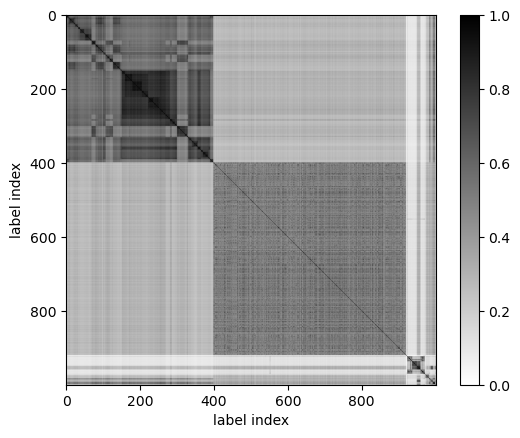

In [2]:
import matplotlib.pyplot as plt
c = plt.imshow(sim,cmap ='binary')
plt.colorbar(c)
plt.xlabel('label index')
plt.ylabel('label index')

In [3]:
np.sum(sim>0.9)-1000

2220

In [3]:
def generate_target_sim(sim, topk=5, gap=0, power=1):
    target_matrix = np.zeros((1000,1000))
    for i in range(1000):
        top_k = sim[i][np.argpartition(sim[i],-topk)[-topk:-topk+1]]
        target_matrix[i,i]=1
        for j in range(i):
            target_matrix[i,j] = pow(max(0,sim[i,j]-gap)/(1-gap), power) if sim[i,j]>=top_k and sim[i,j]>=gap else 0
            target_matrix[j,i] = target_matrix[i,j]
    return target_matrix

Text(0, 0.5, 'label index')

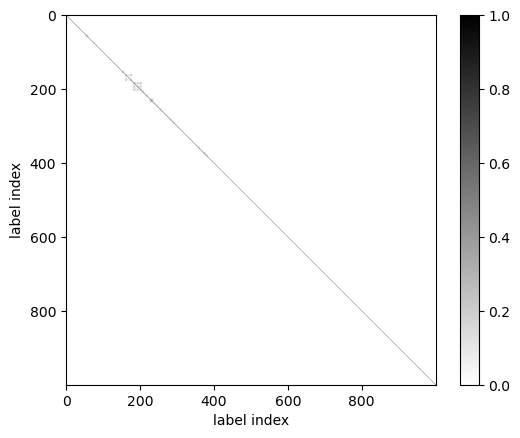

In [4]:
target = generate_target_sim(sim,gap=0.85,power=3)
c = plt.imshow(target,cmap ='binary')
plt.colorbar(c)
plt.xlabel('label index')
plt.ylabel('label index')